In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import graphviz
from sklearn import tree


In [2]:
data=pd.read_csv('books.csv')

In [13]:
data

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


# The original_title of books of John Green author

In [19]:
author=data.loc[data['authors']=='John Green']

In [20]:
author['original_title']

5          The Fault in Our Stars
73             Looking for Alaska
87                    Paper Towns
274    An Abundance of Katherines
Name: original_title, dtype: object

# The highest of 5 star ratings for all books with top 5% of rating counts


In [21]:
top_5 = data['ratings_5']/data['ratings_5'].sum() * 100
top_5.head(5)

0    1.137595
1    1.265896
2    0.569756
3    0.720589
4    0.398371
Name: ratings_5, dtype: float64

# The books the publicated in 2003

In [18]:
puplication_2003=data.loc[data['original_publication_year']==2003]
puplication_2003

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
10,11,77203,77203,3295919,283,1594480001,9.781594e+12,Khaled Hosseini,2003.0,The Kite Runner,...,1813044,1878095,59730,34288,59980,226062,628174,929591,https://images.gr-assets.com/books/1484565687m...,https://images.gr-assets.com/books/1484565687s...
20,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
25,26,968,968,2982101,350,307277674,9.780307e+12,Dan Brown,2003.0,The Da Vinci Code,...,1447148,1557292,41560,71345,126493,340790,539277,479387,https://images.gr-assets.com/books/1303252999m...,https://images.gr-assets.com/books/1303252999s...
37,38,14050,18619684,2153746,167,965818675,9.780966e+12,Audrey Niffenegger,2003.0,The Time Traveler's Wife,...,746287,1308667,43382,44339,85429,257805,427210,493884,https://images.gr-assets.com/books/1437728815m...,https://images.gr-assets.com/books/1437728815s...
59,60,1618,1618,4259809,183,1400032717,9.781400e+12,Mark Haddon,2003.0,The Curious Incident of the Dog in the Night-Time,...,867553,915790,35796,21049,58117,218218,355925,262481,https://images.gr-assets.com/books/1479863624m...,https://images.gr-assets.com/books/1479863624s...
77,78,5139,5139,38765,129,307275558,9.780307e+12,Lauren Weisberger,2003.0,The Devil Wears Prada,...,665930,679845,8024,24231,58323,192366,226675,178250,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
131,132,3431,3431,2561472,123,1401308589,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,...,449501,474699,16682,12360,33669,107800,155830,165040,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
216,217,21996,21996,3486041,70,739303406,9.780739e+12,"Erik Larson, Tony Goldwyn",2003.0,"The Devil in the White City: Murder, Magic, an...",...,309385,350607,25846,6687,18709,69012,135360,120839,https://images.gr-assets.com/books/1312066724m...,https://images.gr-assets.com/books/1312066724s...
268,269,366522,366522,2742631,17,786890754,9.780787e+12,Cecelia Ahern,2003.0,"PS, I Love You",...,262921,283413,7069,7027,16336,56951,90089,113010,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
307,308,33724,33724,2888997,94,440241901,9.780440e+12,Sophie Kinsella,2003.0,Can You Keep a Secret?,...,278747,293801,9510,8003,19319,76244,101810,88425,https://images.gr-assets.com/books/1330464293m...,https://images.gr-assets.com/books/1330464293s...


# The No. of books that published each year 

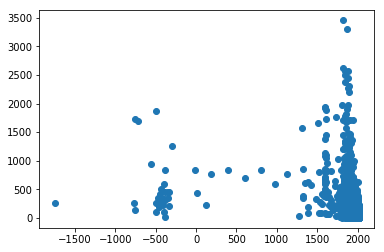

In [22]:

data_year_count=data[['original_publication_year','books_count']]

data_year_count.groupby('original_publication_year').sum()
plt.scatter(data_year_count['original_publication_year'],data_year_count['books_count'])


# Plot between year and books count in that year


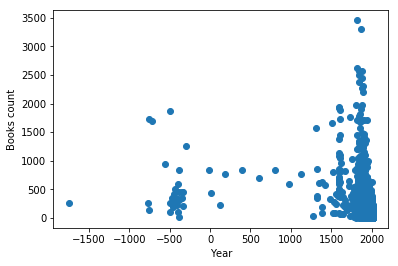

In [14]:
plt.scatter(data['original_publication_year'],data['books_count'])
plt.xlabel('Year')
plt.ylabel('Books count')
plt.show()

In [19]:
data_year_count=data[['original_publication_year','books_count']]
data_year_count

,original_publication_year,books_count
0,2008.0,272
1,1997.0,491
2,2005.0,226
3,1960.0,487
4,1925.0,1356
5,2012.0,226
6,1937.0,969
7,1951.0,360
8,2000.0,311
9,1813.0,3455


# Book published in year -1750


In [20]:
data.loc[data['original_publication_year'] == -1750

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,2076,19351,19351,3802528,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",-1750.0,Shūtur eli sharrī,...,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [30]:

#longest_name=data.iloc[data['original_title'].apply(lambda x: len(x)).idxmax()]['original_title']


# The book of longest author name 


In [31]:
data.iloc[data['authors'].map(len).idxmax()]

id                                                                        6202
book_id                                                                1566053
best_book_id                                                           1566053
work_id                                                                1558637
books_count                                                                 18
isbn                                                                 306816083
isbn13                                                             9.78031e+12
authors                      Christopher Hitchens, Titus Lucretius Carus, O...
original_publication_year                                                 2007
original_title               The Portable Atheist: Essential Readings for t...
title                        The Portable Atheist: Essential Readings for t...
language_code                                                              eng
average_rating                                      

# Find the books that contain 'John' in its authors names

In [35]:
finds_John = data.loc[data['authors'].str.contains ('John') ==True]
finds_John

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
31,32,890,890,40283,373,142000671,9.780142e+12,John Steinbeck,1937.0,Of Mice and Men,...,1467496,1518741,24642,46630,110856,355169,532291,473795,https://images.gr-assets.com/books/1437235233m...,https://images.gr-assets.com/books/1437235233s...
57,58,2956,2956,1835605,2277,142437174,9.780142e+12,"Mark Twain, John Seelye, Guy Cardwell",1884.0,The Adventures of Huckleberry Finn,...,953758,1001491,12448,28467,76630,255722,344356,296316,https://images.gr-assets.com/books/1405973850m...,https://images.gr-assets.com/books/1405973850s...
73,74,99561,99561,919292,187,142402516,9.780142e+12,John Green,2005.0,Looking for Alaska,...,783470,831285,47128,16940,44232,147324,262932,359857,https://images.gr-assets.com/books/1394798630m...,https://images.gr-assets.com/books/1394798630s...
85,86,32542,32542,1804929,158,385338600,9.780385e+12,John Grisham,1989.0,A Time to Kill,...,597775,608824,4239,12106,25938,122675,218617,229488,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
87,88,6442769,6442769,3364505,178,014241493X,9.780142e+12,John Green,2008.0,Paper Towns,...,461311,655271,42717,14105,47183,154479,223895,215609,https://images.gr-assets.com/books/1349013610m...,https://images.gr-assets.com/books/1349013610s...
115,116,24583,24583,41326609,2448,143039563,9.780143e+12,"Mark Twain, Guy Cardwell, John Seelye",1876.0,The Adventures of Tom Sawyer,...,555359,594226,7165,12130,34349,143659,217896,186192,https://images.gr-assets.com/books/1404811979m...,https://images.gr-assets.com/books/1404811979s...
122,123,5358,5358,38270,11,582418275,9.780582e+12,John Grisham,1991.0,The Firm,...,488269,488355,3139,5075,20119,111543,190966,160652,https://images.gr-assets.com/books/1418465200m...,https://images.gr-assets.com/books/1418465200s...
130,131,4395,18114322,2931549,381,142000663,9.780142e+12,John Steinbeck,1939.0,The Grapes of Wrath,...,322321,553352,12991,23552,40261,103475,173589,212475,https://images.gr-assets.com/books/1352912927m...,https://images.gr-assets.com/books/1352912927s...
190,191,472331,472331,4358649,90,930289234,9.780930e+12,"Alan Moore, Dave Gibbons, John Higgins",1987.0,Watchmen,...,398018,409323,10851,6349,11732,44847,116877,229518,https://images.gr-assets.com/books/1442239711m...,https://images.gr-assets.com/books/1442239711s...


In [36]:
puplication_2003

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
10,11,77203,77203,3295919,283,1594480001,9.781594e+12,Khaled Hosseini,2003.0,The Kite Runner,...,1813044,1878095,59730,34288,59980,226062,628174,929591,https://images.gr-assets.com/books/1484565687m...,https://images.gr-assets.com/books/1484565687s...
20,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
25,26,968,968,2982101,350,307277674,9.780307e+12,Dan Brown,2003.0,The Da Vinci Code,...,1447148,1557292,41560,71345,126493,340790,539277,479387,https://images.gr-assets.com/books/1303252999m...,https://images.gr-assets.com/books/1303252999s...
37,38,14050,18619684,2153746,167,965818675,9.780966e+12,Audrey Niffenegger,2003.0,The Time Traveler's Wife,...,746287,1308667,43382,44339,85429,257805,427210,493884,https://images.gr-assets.com/books/1437728815m...,https://images.gr-assets.com/books/1437728815s...
59,60,1618,1618,4259809,183,1400032717,9.781400e+12,Mark Haddon,2003.0,The Curious Incident of the Dog in the Night-Time,...,867553,915790,35796,21049,58117,218218,355925,262481,https://images.gr-assets.com/books/1479863624m...,https://images.gr-assets.com/books/1479863624s...
77,78,5139,5139,38765,129,307275558,9.780307e+12,Lauren Weisberger,2003.0,The Devil Wears Prada,...,665930,679845,8024,24231,58323,192366,226675,178250,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
131,132,3431,3431,2561472,123,1401308589,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,...,449501,474699,16682,12360,33669,107800,155830,165040,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
216,217,21996,21996,3486041,70,739303406,9.780739e+12,"Erik Larson, Tony Goldwyn",2003.0,"The Devil in the White City: Murder, Magic, an...",...,309385,350607,25846,6687,18709,69012,135360,120839,https://images.gr-assets.com/books/1312066724m...,https://images.gr-assets.com/books/1312066724s...
268,269,366522,366522,2742631,17,786890754,9.780787e+12,Cecelia Ahern,2003.0,"PS, I Love You",...,262921,283413,7069,7027,16336,56951,90089,113010,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
307,308,33724,33724,2888997,94,440241901,9.780440e+12,Sophie Kinsella,2003.0,Can You Keep a Secret?,...,278747,293801,9510,8003,19319,76244,101810,88425,https://images.gr-assets.com/books/1330464293m...,https://images.gr-assets.com/books/1330464293s...


In [50]:
#The maximum rating
max_rating=data['ratings_count'].max()
max_rating


4780653

In [ ]:
# The minimum rating

min_rating=data['ratings_count'].min()
min_rating

In [52]:
#The book of maximum rating
max_book=data.loc[data['ratings_count']==4780653]
max_book

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [51]:
#The book of minimum rating
min_book=data.loc[data['ratings_count']==2716]
min_book

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7638,7639,192510,192510,186149,91,964913980X,NaN,"José Mauro de Vasconcelos, قاسم صنعوی",1968.0,Meu Pé de Laranja Lima,...,2716,15091,931,164,392,1644,4516,8375,https://images.gr-assets.com/books/1502523710m...,https://images.gr-assets.com/books/1502523710s...


# The book of maximum books_count 

In [56]:
books_count=data.loc[data['books_count'].idxmax()]
books_count

id                                                                          10
book_id                                                                   1885
best_book_id                                                              1885
work_id                                                                3060926
books_count                                                               3455
isbn                                                                 679783261
isbn13                                                             9.78068e+12
authors                                                            Jane Austen
original_publication_year                                                 1813
original_title                                             Pride and Prejudice
title                                                      Pride and Prejudice
language_code                                                              eng
average_rating                                      